<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Salary_Dataset_DataScienceLovers.csv")
data.head(3)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android


In [3]:
data.shape

(22770, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


**DATA CLEANING**

In [6]:
data.isnull().sum()

,0
Rating,0
Company Name,1
Job Title,0
Salary,0
Salaries Reported,0
Location,0
Employment Status,0
Job Roles,0


In [7]:
data=data.drop_duplicates()
data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [8]:
data.describe(include='all')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
count,22770.000000,22769,22770,2.277000e+04,22770.000000,22770,22770,22770
unique,NaN,11260,1080,NaN,NaN,10,4,11
top,NaN,Tata Consultancy Services,Software Development Engineer,NaN,NaN,Bangalore,Full Time,SDE
freq,NaN,271,2351,NaN,NaN,8264,20083,8183
mean,3.918213,NaN,NaN,6.953872e+05,1.855775,NaN,NaN,NaN
std,0.519675,NaN,NaN,8.843990e+05,6.823668,NaN,NaN,NaN
min,1.000000,NaN,NaN,2.112000e+03,1.000000,NaN,NaN,NaN
25%,3.700000,NaN,NaN,3.000000e+05,1.000000,NaN,NaN,NaN
50%,3.900000,NaN,NaN,5.000000e+05,1.000000,NaN,NaN,NaN
75%,4.200000,NaN,NaN,9.000000e+05,1.000000,NaN,NaN,NaN


**visualization**

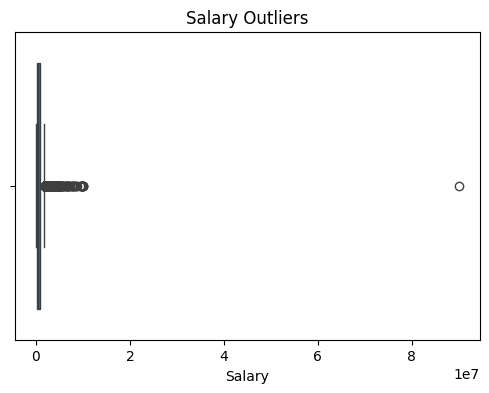

In [9]:
#Salary

plt.figure(figsize=(6,4))
sns.boxplot(x=data['Salary'])
plt.title("Salary Outliers")
plt.show()

In [10]:
#IQR method.

Q1=data['Salary'].quantile(0.25)
Q3=data['Salary'].quantile(0.75)

IQR=Q3-Q1
IQR

np.float64(600000.0)

In [11]:
#calculate IQR

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [12]:
print(lower_limit)
print(upper_limit)

-600000.0
1800000.0


In [13]:
#Lower outlier limit

data=data[(data['Salary']>=lower_limit) & (data['Salary']<=upper_limit)]
data.head(2)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android


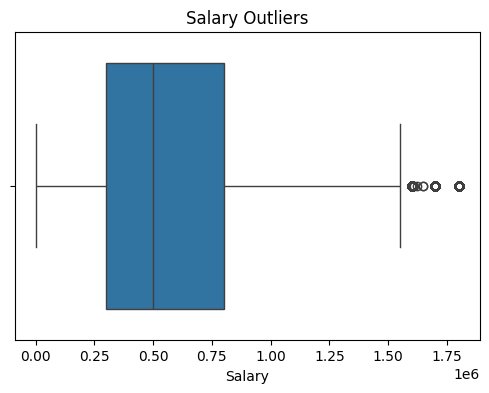

In [14]:
#outlier -second time
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Salary'])
plt.title("Salary Outliers")
plt.show()

In [15]:
Q1=data['Salary'].quantile(0.25)
Q3=data['Salary'].quantile(0.75)

IQR=Q3-Q1
IQR

np.float64(500000.0)

In [16]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [17]:
print(lower_limit)
print(upper_limit)

-450000.0
1550000.0


In [18]:
data=data[(data['Salary']>=lower_limit) & (data['Salary']<=upper_limit)]
data.head(2)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android


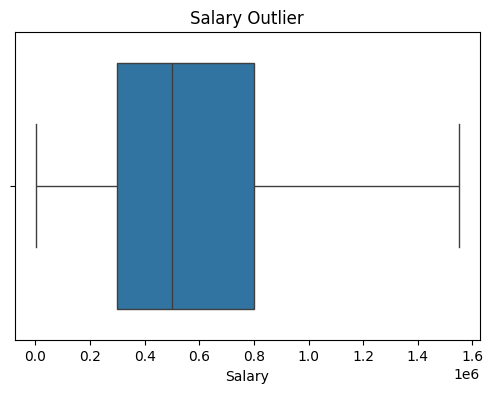

In [19]:
#outlier - third time - no outlier detected.

plt.figure(figsize=(6,4))
sns.boxplot(x=data['Salary'])
plt.title("Salary Outlier")
plt.show()

In [ ]:
data

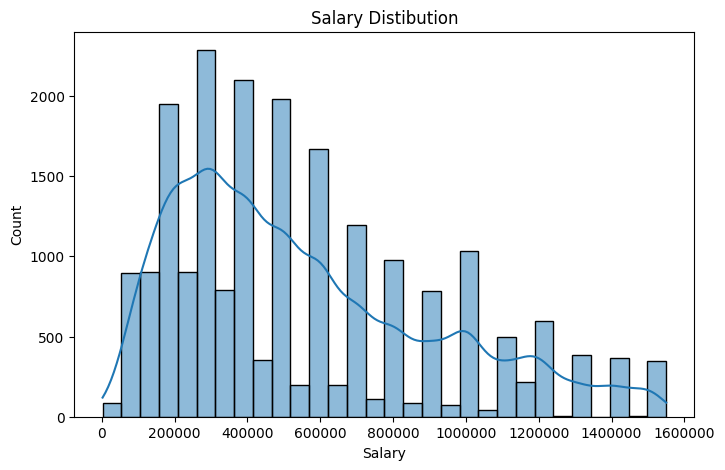

In [20]:
#salary distribution.

plt.figure(figsize=(8,5))
sns.histplot(data['Salary'],bins=30,kde=True)
plt.ticklabel_format(style='plain',axis='x')
plt.title("Salary Distibution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

In [21]:
#which job roles have highest average salary?

data['Job Roles'].nunique()

11

In [22]:
data['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [23]:
#grouping data

job=data.groupby("Job Roles")["Salary"].mean().sort_values(ascending = False)

job.head(10)

,Salary
Job Roles,
Database,702554.768392
SDE,648182.534714
IOS,593214.068241
Mobile,589857.819905
Backend,529104.564347
Frontend,501977.282203
Android,483352.318634
Java,475832.116985
Testing,464824.757895


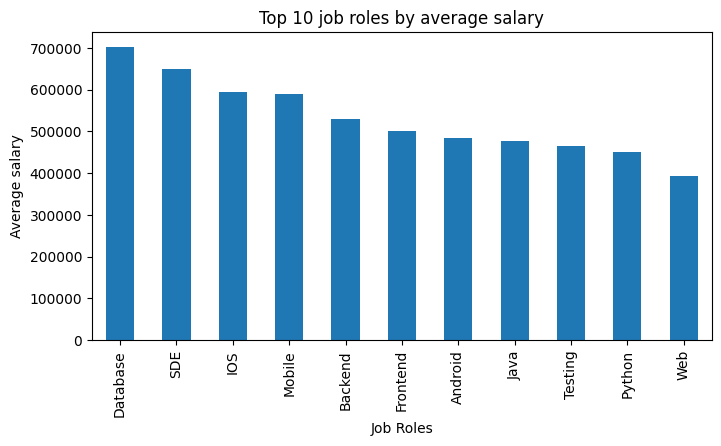

In [24]:
#bar chat

plt.figure(figsize=(8,4))
job.plot(kind='bar')
plt.title("Top 10 job roles by average salary")
plt.ylabel("Average salary")
plt.show()

In [25]:
#which cities offer highest average salary?

print(data['Location'].unique())

print(data['Location'].nunique())

['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Jaipur' 'Kerala'
 'Kolkata' 'Madhya Pradesh' 'Mumbai']
10


In [26]:
#group data

loc=data.groupby('Location')["Salary"].mean().sort_values(ascending=False)
loc.head(10)


,Salary
Location,
Mumbai,702195.874214
Bangalore,568223.271851
Jaipur,566153.846154
Pune,562387.138833
New Delhi,542717.057751
Hyderabad,538809.567450
Kolkata,532604.938272
Kerala,514965.735849
Chennai,505102.446337


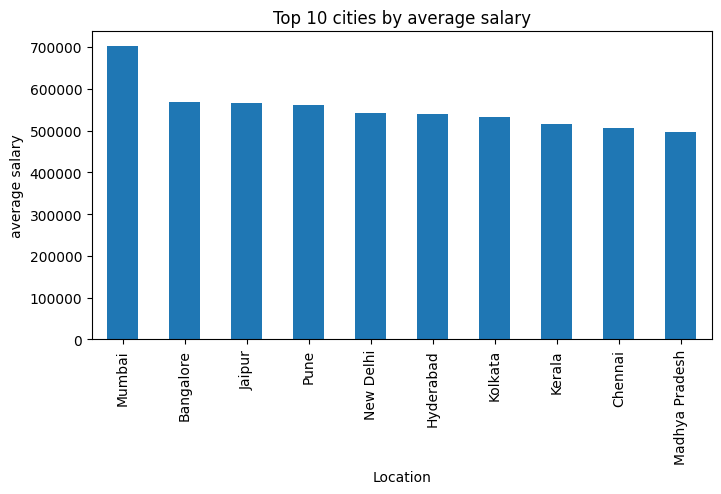

In [27]:
#barchat
plt.figure(figsize=(8,4))
loc.plot(kind='bar')
plt.title("Top 10 cities by average salary")
plt.ylabel("average salary")
plt.show()

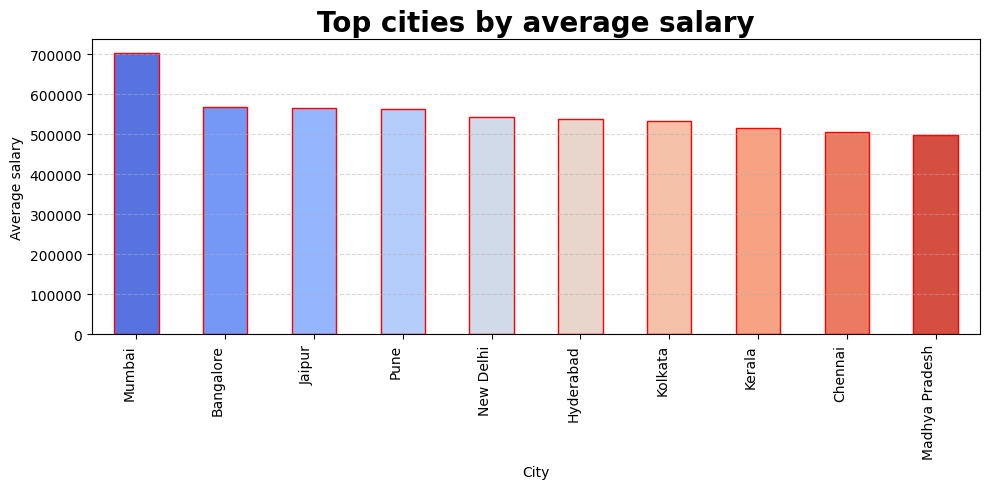

In [28]:
plt.figure(figsize=(10,5))
colors=sns.color_palette("coolwarm",len(loc))
loc.plot(kind="bar",color=colors,edgecolor="red")
plt.title("Top cities by average salary", fontsize=20,fontweight="bold")
plt.xlabel("City")
plt.ylabel("Average salary")
plt.xticks(rotation=90,ha="right")
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
#Name those 5 companies located in "New Delhi" with ratings of "5" offering highest & lowest salaries.
#Filtering data.

da=data[(data['Location'] == "New Delhi") & (data["Rating"] == 5)].sort_values(by="Salary",ascending=False)
da.head(3)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1888,5.0,Trillbit,Android Developer,1500000,1,New Delhi,Full Time,Android
6750,5.0,Hapramp,Front End Developer,1500000,1,New Delhi,Full Time,Frontend
17488,5.0,The Art of Mike Mignola,Software Development Engineer,1500000,1,New Delhi,Full Time,SDE


In [30]:
list(da["Company Name"].head())

['Trillbit',
 'Hapramp',
 'The Art of Mike Mignola',
 'Silicon Valley Recycling',
 'Parth Universal']

In [ ]:
data['Company Name'].nunique()

10838

In [31]:
#which job title has the highest number of salary reported?
data['Job Title'].value_counts()

,count
Job Title,
Software Development Engineer,2137
Android Developer,1983
Software Development Engineer (SDE),1477
Front End Developer,1360
Test Engineer,1290
...,...
Software Testing,1
Automation Tester,1
Web Developer/Android Developer - Intern,1


In [32]:
data.groupby("Job Title")["Salaries Reported"].count().sort_values(ascending=False)


,Salaries Reported
Job Title,
Software Development Engineer,2137
Android Developer,1983
Software Development Engineer (SDE),1477
Front End Developer,1360
Test Engineer,1290
...,...
UI/User Experience Designer & Front End Developer,1
UI/UX Designer & Front End Developer,1
UI Front End Developer,1


In [33]:
# which 10 companies provide the highest average salary, when at least 20 employees have reported their salaies?
#Filtering data
df1=data[data['Salaries Reported']>=20]
df1


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8790,3.9,Tata Consultancy Services,Java Developer,200000,30,Chennai,Full Time,Java
8977,3.8,Cognizant Technology Solutions,Senior Java Developer,200000,35,Chennai,Full Time,Java
8978,3.9,Tata Consultancy Services,Senior Java Developer,300000,30,Chennai,Full Time,Java
8979,3.9,Tata Consultancy Services,Junior Java Developer,200000,30,Chennai,Full Time,Java
9688,3.9,Tata Consultancy Services,Java Developer,200000,43,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
21762,3.8,CGI,Senior Test Engineer,400000,21,Bangalore,Full Time,Testing
21763,4.1,IBM,Test Automation Engineer,400000,21,Bangalore,Full Time,Testing
21764,3.7,SLK Group,Software Test Engineer,300000,20,Bangalore,Full Time,SDE
21765,4.3,Cisco Systems,Software Test Engineer,700000,20,Bangalore,Full Time,SDE


In [34]:
df1.groupby("Company Name")["Salary"].mean().sort_values(ascending=False).head(10)

,Salary
Company Name,
Expedia Group,1.350000e+06
Nokia,1.200000e+06
Amadeus,1.200000e+06
Alcatel-Lucent,1.000000e+06
Ola,1.000000e+06
Kony,9.000000e+05
Lumen,9.000000e+05
Microsoft,7.845714e+05
Cisco Systems,7.000000e+05


In [35]:
# check and show the relationship between Ratings & Slaries.

data.corr(numeric_only=True)

,Rating,Salary,Salaries Reported
Rating,1.000000,0.024772,-0.013516
Salary,0.024772,1.000000,-0.021672
Salaries Reported,-0.013516,-0.021672,1.000000


**Correlation Between Columns**

In [36]:
data['Rating'].corr(data['Salary'])

np.float64(0.024771628383435627)

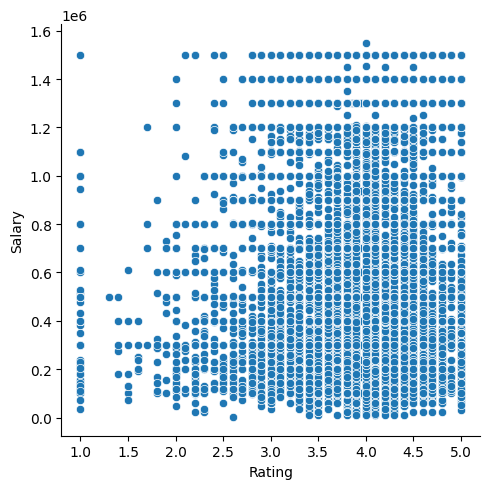

In [37]:
#Scatter plot
sns.relplot(x="Rating",y="Salary",data=data)
plt.show()

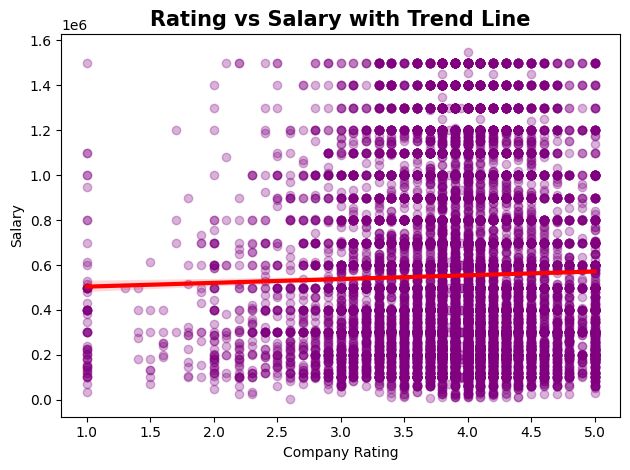

In [38]:
#Scatter with trendline.
sns.regplot(x="Rating",y="Salary",data=data,scatter_kws={"alpha":0.3,"color":"purple"},line_kws={"color":"red","linewidth":3})
plt.title("Rating vs Salary with Trend Line", fontsize=15,fontweight="bold")
plt.xlabel("Company Rating")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

In [39]:
#Does employment status affect salary?

data['Employment Status'].unique()

array(['Full Time', 'Intern', 'Contractor', 'Trainee'], dtype=object)

In [40]:
#Count Frequency
data['Employment Status'].value_counts()

,count
Employment Status,
Full Time,18379
Intern,2089
Contractor,513
Trainee,33


In [41]:
#Group data
data.groupby("Employment Status")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Contractor,513.0,501507.586745,315663.813209,12000.0,300000.0,400000.0,600000.0,1500000.0
Full Time,18379.0,579305.536101,358065.460032,8448.0,300000.0,500000.0,800000.0,1550000.0
Intern,2089.0,338353.991383,264180.887035,2112.0,144000.0,264000.0,456000.0,1500000.0
Trainee,33.0,324303.030303,241096.516572,96000.0,144000.0,240000.0,400000.0,1100000.0


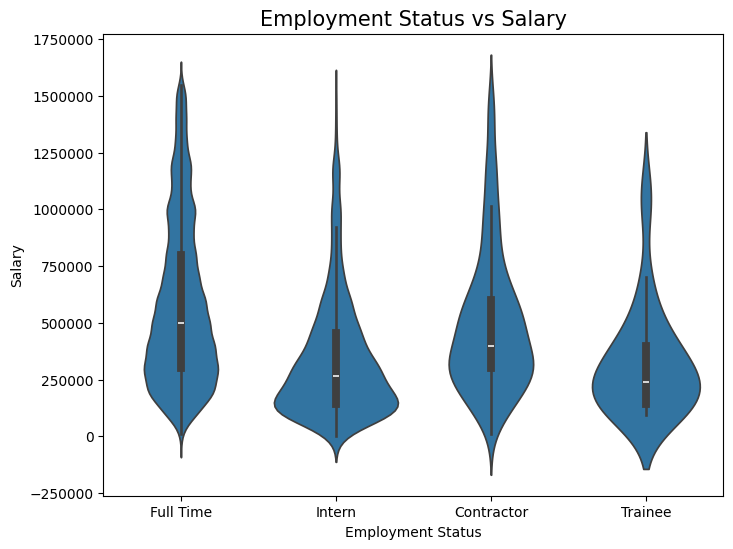

In [42]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Employment Status",y="Salary",data=data)
plt.ticklabel_format(style="plain",axis="y")#1e6with out line (1000000with this line)
plt.title("Employment Status vs Salary",fontsize=15)
plt.xlabel("Employment Status")
plt.ylabel("Salary")
plt.show()

In [43]:
#Which job roles are most common?

jobroles=(data["Job Roles"].value_counts().head(10))
jobroles

,count
Job Roles,
SDE,7245
Android,2812
Frontend,2034
Java,1778
Testing,1710
IOS,1524
Backend,1049
Web,988
Python,929


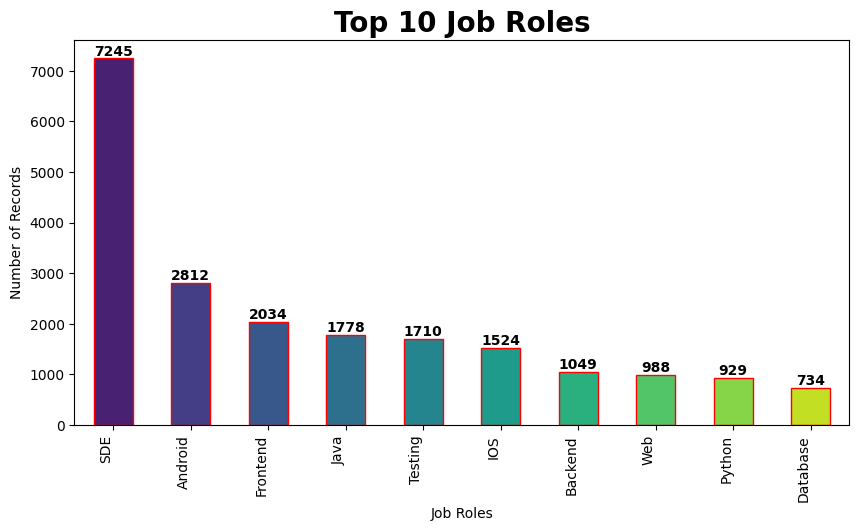

In [44]:
plt.figure(figsize=(10,5))
colors=sns.color_palette("viridis",len(jobroles))
ax=jobroles.plot(kind="bar",color=colors,edgecolor="red")
#add values inside bars
ax.bar_label(ax.containers[0],label_type="edge",fontsize=10,color="black",fontweight="bold") #ax.containers[0]-first bar group
plt.title("Top 10 Job Roles", fontsize=20,fontweight="bold")
plt.xlabel("Job Roles")
plt.ylabel("Number of Records")
plt.xticks(rotation=90,ha="right")
plt.show()

In [45]:
#How does average salary change as company rating increase?

rating_salary=data.groupby("Rating")["Salary"].mean().reset_index()
rating_salary.head()

,Rating,Salary
0,1.0,399971.500000
1,1.3,500000.000000
2,1.4,331200.000000
3,1.5,241000.000000
4,1.6,262285.714286


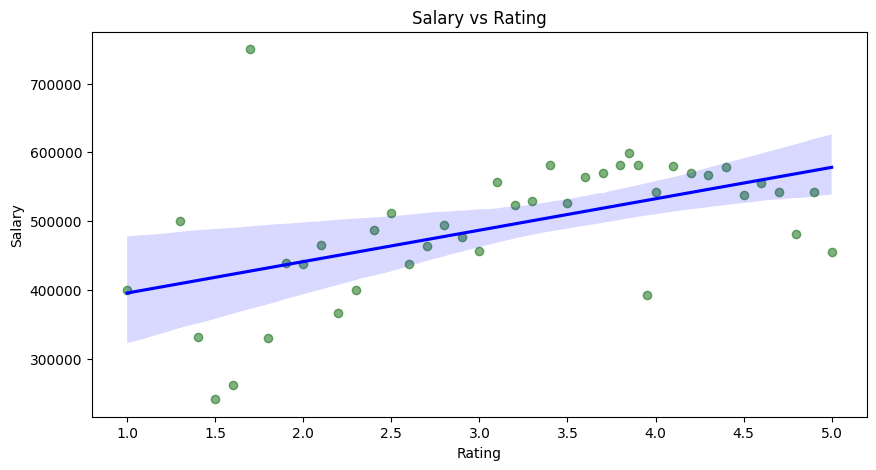

In [46]:
plt.figure(figsize=(10,5))
sns.regplot(x="Rating",y="Salary",data=rating_salary,scatter_kws={"alpha":0.5,"color":"darkgreen"},line_kws={"color":"blue"})
plt.title("Salary vs Rating")
#plt.xlabel("Company Rating")
#plt.ylabel("Average Salary")
plt.show()